In [1]:
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from keras.preprocessing import image

In [2]:
tf.keras.utils.set_random_seed(42)

In [3]:
from google.colab import drive
import pathlib
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
def avg_loss_cs(pred,label):
  dist = np.abs(pred.flatten()-label.flatten())
  circle = np.array([np.mod(dist,720),np.mod(-dist,720)]).T
  circle_dist = np.min(circle,axis=1)
  return np.mean(circle_dist)

### Uploading the data

In [5]:
df = np.load('drive/MyDrive/Intro_to_DP/images.npy')
labels = np.load('drive/MyDrive/Intro_to_DP/labels.npy')

<class 'numpy.ndarray'>
(150, 150, 1)


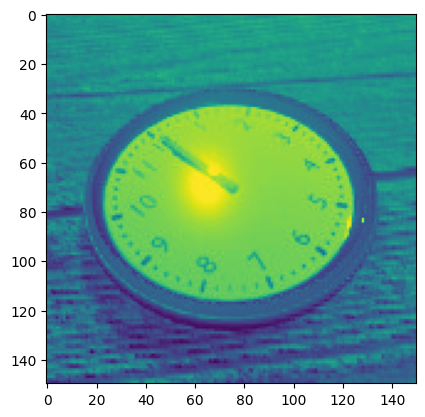

In [6]:

img = df[3]
x = image.img_to_array(img)
print(type(x))
print(x.shape)
plt.imshow(x)

Normalizing the input data

In [7]:
normalizer_layer = tf.keras.layers.Normalization(axis=1)
normalizer_layer.adapt(df)
output = normalizer_layer(df)

In [8]:
data = np.array(output)

In [9]:
labels_all = labels[:,0]*60 + labels[:,1]

## First apporach: Classification

In [12]:
def group_class(interval,y_train,y_test):
  y_train_new = y_train//interval
  y_test_new = y_test//interval
  num_class = 720//interval
  y_test_new = tf.keras.utils.to_categorical(y_test_new, num_classes=num_class)
  y_train_new = tf.keras.utils.to_categorical(y_train_new, num_classes=num_class)
  return y_train_new, y_test_new, num_class

In [13]:
X_train, X_test, y_train, y_test = train_test_split(data,labels_all,test_size = 0.2,shuffle = True)

In [12]:
# interval = 30
# y_train, y_test_2, num_class = group_class(interval,y_train,y_test)

In [12]:
# interval = 15
# y_train, y_test_2, num_class = group_class(interval,y_train,y_test)

In [13]:
interval = 10
y_train, y_test_2, num_class = group_class(interval,y_train,y_test)

In [12]:
# interval = 5
# y_train, y_test_2, num_class = group_class(interval,y_train,y_test)

In [14]:
# interval = 2
# y_train, y_test_2, num_class = group_class(interval,y_train,y_test)

In [1]:
# interval = 1
# y_train, y_test_2, num_class = group_class(interval,y_train,y_test)

In [15]:
model = tf.keras.Sequential([
    layers.Conv2D(15, ((8,8)),strides = 3, activation = 'relu', input_shape = (150,150,1)),
    # layers.MaxPooling2D(2,2),
    # layers.Conv2D(75, ((4,4)),activation = 'relu', input_shape = (145,145,20)),
    # layers.Conv2D(40, ((5,5)),activation = 'relu', input_shape = (145,145,20)),
    layers.MaxPooling2D(pool_size = (3,3),strides = 2),

    layers.Conv2D(30, ((4,4)), activation = 'relu', input_shape = (72,72,40)),
    # layers.MaxPooling2D(2,2),
    layers.Conv2D(45, (3,3), activation = 'relu', input_shape = (34,34,100)),
    layers.Conv2D(45, ((3,3)), activation = 'relu', input_shape = (68,68,75)),
    layers.MaxPooling2D(pool_size=(2,2)),

    layers.Conv2D(80, (3,3), activation = 'relu', input_shape = (34,34,100)),
    # layers.MaxPooling2D(2,2),

    layers.Conv2D(80, (3,3), activation = 'relu', input_shape = (3,3,75)),
    # layers.MaxPooling2D(2,2),

    layers.Conv2D(80, (3,3), activation = 'relu', input_shape = (5,5,200)),
    # layers.Conv2D(400, (3,3), activation = 'relu', input_shape = (5,5,200)),
    # layers.Conv2D(200, (3,3), activation = 'relu', input_shape = (5,5,200)),
    # layers.Conv2D(150, (3,3), activation = 'relu', input_shape = (3,3,200)),
    # layers.Conv2D(120, (3,3), activation = 'relu', input_shape = (150,150,1)),
    # layers.MaxPooling2D(2,2),

    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(256, activation='relu'),
    layers.Dense(num_class, activation = 'softmax')
])

In [16]:
opt = tf.keras.optimizers.Adam()
early_stopping = tf.keras.callbacks.EarlyStopping(patience = 6, verbose = 1)
model.compile(optimizer='adam',
              loss=tf.keras.losses.categorical_crossentropy,
              metrics=['accuracy'])

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 15)        975       
                                                                 
 max_pooling2d (MaxPooling2  (None, 23, 23, 15)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 20, 20, 30)        7230      
                                                                 
 conv2d_2 (Conv2D)           (None, 18, 18, 45)        12195     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 45)        18270     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 8, 8, 45)          0         
 g2D)                                                   

In [18]:
history = model.fit(X_train, y_train, epochs=50, batch_size = 128, validation_data = (X_test, y_test_2), callbacks = [early_stopping])

Epoch 1/50
113/113 [==============================] - 19s 42ms/step - loss: 5.8873 - accuracy: 0.0013 - val_loss: 5.8876 - val_accuracy: 0.0011
Epoch 2/50
113/113 [==============================] - 2s 20ms/step - loss: 5.8865 - accuracy: 0.0016 - val_loss: 5.8889 - val_accuracy: 8.3333e-04
Epoch 3/50
113/113 [==============================] - 2s 21ms/step - loss: 5.8862 - accuracy: 0.0024 - val_loss: 5.8902 - val_accuracy: 0.0011
Epoch 4/50
113/113 [==============================] - 2s 20ms/step - loss: 5.8859 - accuracy: 0.0028 - val_loss: 5.8912 - val_accuracy: 8.3333e-04
Epoch 5/50
113/113 [==============================] - 3s 23ms/step - loss: 5.8857 - accuracy: 0.0032 - val_loss: 5.8923 - val_accuracy: 8.3333e-04
Epoch 6/50
113/113 [==============================] - 3s 24ms/step - loss: 5.8856 - accuracy: 0.0033 - val_loss: 5.8934 - val_accuracy: 8.3333e-04
Epoch 7/50
113/113 [==============================] - 2s 21ms/step - loss: 5.8854 - accuracy: 0.0027 - val_loss: 5.8946 - val

In [ ]:
plt.figure(figsize=(16,5))
plt.plot(history.history['loss'],color='blue')
plt.plot(history.history['val_loss'],color='orange')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [19]:
pred = np.argmax(model.predict(X_test),axis =1)

113/113 [==============================] - 1s 4ms/step


In [20]:
preds_1 = pred*interval

In [ ]:
np.save('drive/MyDrive/Intro_to_DP/labels_1',preds_1)
np.save('drive/MyDrive/Intro_to_DP/preds_1',y_test)

In [ ]:
preds_1 = np.load('drive/MyDrive/Intro_to_DP/preds_1.npy')
y_test = np.load('drive/MyDrive/Intro_to_DP/labels_1.npy')

In [21]:
avg_loss_cs(preds_1,y_test)

180.5536111111111

## Second Approach - Regression

In [22]:
def scaler(X,max,min):
  X_scaled = (X - np.min(X)) / (np.max(X) - np.min(X)) * (max - min) + min
  return X_scaled

Here is the data transformed into a

In [23]:
scaled_labels =scaler(labels_all,12,0)
scaled_labels.astype(float)

array([ 0.,  0.,  0., ..., 12., 12., 12.])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data,scaled_labels,test_size = 0.2,random_state = 0,shuffle = True)

In [ ]:
model = tf.keras.Sequential([
    layers.Conv2D(15, ((8,8)),strides = 3, activation = 'tanh', input_shape = (150,150,1)),
    # layers.MaxPooling2D(2,2),
    # layers.Conv2D(75, ((4,4)),activation = 'relu', input_shape = (145,145,20)),
    # layers.Conv2D(40, ((5,5)),activation = 'relu', input_shape = (145,145,20)),
    layers.MaxPooling2D(pool_size = (3,3),strides = 2),

    layers.Conv2D(30, ((4,4)), activation = 'tanh', input_shape = (72,72,40)),
    # layers.MaxPooling2D(2,2),
    layers.Conv2D(45, (3,3), activation = 'tanh', input_shape = (34,34,100)),
    layers.Conv2D(45, ((3,3)), activation = 'tanh', input_shape = (68,68,75)),
    layers.MaxPooling2D(pool_size=(2,2)),

    layers.Conv2D(80, (3,3), activation = 'tanh', input_shape = (34,34,100)),
    # layers.MaxPooling2D(2,2),

    layers.Conv2D(80, (3,3), activation = 'tanh', input_shape = (3,3,75)),
    # layers.MaxPooling2D(2,2),

    layers.Conv2D(80, (3,3), activation = 'tanh', input_shape = (5,5,200)),
    # layers.Conv2D(400, (3,3), activation = 'relu', input_shape = (5,5,200)),
    # layers.Conv2D(200, (3,3), activation = 'relu', input_shape = (5,5,200)),
    # layers.Conv2D(150, (3,3), activation = 'relu', input_shape = (3,3,200)),
    # layers.Conv2D(120, (3,3), activation = 'relu', input_shape = (150,150,1)),
    # layers.MaxPooling2D(2,2),

    layers.Flatten(),
    layers.Dense(512, activation='tanh'),
    layers.Dropout(0.3),
    layers.Dense(256, activation='tanh'),
    layers.Dense(1)
])

In [ ]:
model.summary()

In [ ]:
# model.compile(optimizer=tf.keras.optimizers.RMSprop(),
#               loss=tf.keras.losses.MeanSquaredError(),
#               metrics=['mse'])
model.compile(optimizer='adam',
              loss=tf.keras.losses.MeanSquaredError(),
              metrics=['mse'])

In [ ]:
history = model.fit(X_train, y_train, epochs=50, batch_size = 128, validation_data = (X_test, y_test))

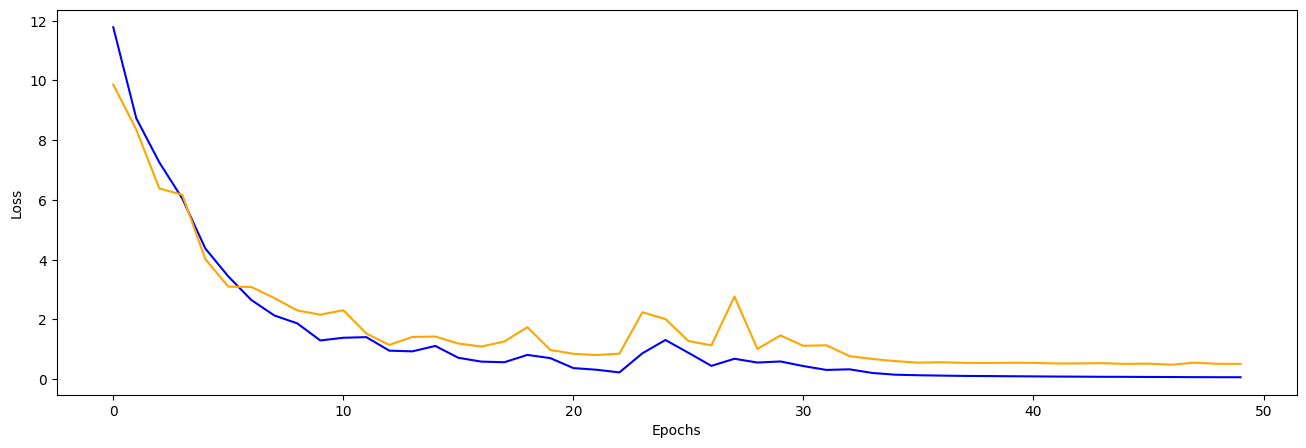

In [ ]:
plt.figure(figsize=(16,5))
plt.plot(history.history['loss'],color='blue')
plt.plot(history.history['val_loss'],color='orange')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [ ]:
pred = model.predict(X_test)
preds_2 = pred*60

113/113 [==============================] - 1s 3ms/step


In [ ]:
np.save('drive/MyDrive/Intro_to_DP/preds_2',preds_2)
np.save('drive/MyDrive/Intro_to_DP/labels_2',y_test)

In [ ]:
preds_2 = np.load('drive/MyDrive/Intro_to_DP/preds_2.npy')
y_test = np.load('drive/MyDrive/Intro_to_DP/labels_2.npy')

In [ ]:
la = y_test*60

In [ ]:
la

array([ 58.08066759, 385.53546592,  84.11682893, ..., 702.97635605,
       130.18080668, 702.97635605])

In [ ]:
avg_loss_cs(preds_2,la)

18.54798940187312

## Third Approach: Multi head model

Here is the model that uses one convulitional network and then the outputs are based on two different fully conected linear networks


In [10]:
labels_h = labels[:,0]
labels_m = labels[:,1]//5

In [11]:
labels_h = tf.keras.utils.to_categorical(labels_h, num_classes=12)
labels_m = tf.keras.utils.to_categorical(labels_m, num_classes=12)

In [12]:
labels_m.shape

(18000, 12)

In [15]:
tmp = np.hstack([labels_h,labels_m])

In [16]:
tmp.shape

(18000, 24)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(data,tmp,test_size = 0.2,random_state = 0)

In [20]:
input = tf.keras.layers.Input(shape = [150,150])
cnn_out  = tf.keras.Sequential([
    layers.Conv2D(15, ((8,8)),strides = 3, activation = 'relu', input_shape = (150,150,1)),
    # layers.MaxPooling2D(2,2),
    # layers.Conv2D(75, ((4,4)),activation = 'relu', input_shape = (145,145,20)),
    # layers.Conv2D(40, ((5,5)),activation = 'relu', input_shape = (145,145,20)),
    layers.MaxPooling2D(pool_size = (3,3),strides = 2),

    layers.Conv2D(30, ((4,4)), activation = 'relu', input_shape = (72,72,40)),
    # layers.MaxPooling2D(2,2),
    layers.Conv2D(45, (3,3), activation = 'relu', input_shape = (34,34,100)),
    layers.Conv2D(45, ((3,3)), activation = 'relu', input_shape = (68,68,75)),
    layers.MaxPooling2D(pool_size=(2,2)),

    layers.Conv2D(80, (3,3), activation = 'relu', input_shape = (34,34,100)),
    # layers.MaxPooling2D(2,2),

    layers.Conv2D(80, (3,3), activation = 'relu', input_shape = (3,3,75)),
    # layers.MaxPooling2D(2,2),

    layers.Conv2D(80, (3,3), activation = 'relu', input_shape = (5,5,200)),
    # layers.Conv2D(400, (3,3), activation = 'relu', input_shape = (5,5,200)),
    # layers.Conv2D(200, (3,3), activation = 'relu', input_shape = (5,5,200)),
    # layers.Conv2D(150, (3,3), activation = 'relu', input_shape = (3,3,200)),
    # layers.Conv2D(120, (3,3), activation = 'relu', input_shape = (150,150,1)),
    # layers.MaxPooling2D(2,2),

    layers.Flatten()
])(input)

# minutes_out = layers.Dense(1,activation = 'softmax')(cnn_out)

hours_out = tf.keras.Sequential([ layers.Dense(512, activation='relu'),
      layers.Dense(256, activation='relu'),
      layers.Dense(12,activation = 'softmax')])(cnn_out)

minutes_out = tf.keras.Sequential([ layers.Dense(512, activation='relu'),
      layers.Dense(256, activation='relu'),
      layers.Dense(12,activation = 'softmax')])(cnn_out)


In [21]:
model = tf.keras.models.Model(inputs = input, outputs = [hours_out,minutes_out])

In [22]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 150, 150)]           0         []                            
                                                                                                  
 sequential (Sequential)     (None, 320)                  186510    ['input_1[0][0]']             
                                                                                                  
 sequential_1 (Sequential)   (None, 12)                   298764    ['sequential[0][0]']          
                                                                                                  
 sequential_2 (Sequential)   (None, 12)                   298764    ['sequential[0][0]']          
                                                                                              

In [23]:
# model = MultiHeadModel()

In [24]:
model.compile(loss=[tf.keras.losses.categorical_crossentropy,tf.keras.losses.categorical_crossentropy], loss_weights=[0.6, 0.4], optimizer="adam", metrics = 'accuracy')

In [25]:
y_train[:,12].shape

(14400,)

In [26]:
history = model.fit(X_train,[y_train[:,:12],y_train[:,12:]],epochs = 40, batch_size = 128, validation_data = (X_test, [y_test[:,:12],y_test[:,12:]]))

Epoch 1/40
113/113 [==============================] - 18s 42ms/step - loss: 2.3999 - sequential_1_loss: 2.3900 - sequential_2_loss: 2.4149 - sequential_1_accuracy: 0.1157 - sequential_2_accuracy: 0.1108 - val_loss: 2.1581 - val_sequential_1_loss: 2.1394 - val_sequential_2_loss: 2.1863 - val_sequential_1_accuracy: 0.1747 - val_sequential_2_accuracy: 0.1692
Epoch 2/40
113/113 [==============================] - 3s 26ms/step - loss: 1.9011 - sequential_1_loss: 1.8386 - sequential_2_loss: 1.9950 - sequential_1_accuracy: 0.2573 - sequential_2_accuracy: 0.2151 - val_loss: 1.6498 - val_sequential_1_loss: 1.5345 - val_sequential_2_loss: 1.8227 - val_sequential_1_accuracy: 0.3800 - val_sequential_2_accuracy: 0.2650
Epoch 3/40
113/113 [==============================] - 3s 22ms/step - loss: 1.3431 - sequential_1_loss: 1.2039 - sequential_2_loss: 1.5519 - sequential_1_accuracy: 0.5118 - sequential_2_accuracy: 0.3696 - val_loss: 1.1174 - val_sequential_1_loss: 0.9703 - val_sequential_2_loss: 1.3381 

In [ ]:
plt.figure(figsize=(16,5))
plt.plot(history.history['loss'],color='blue')
plt.plot(history.history['val_loss'],color='orange')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [27]:
preds = model.predict(X_test)

113/113 [==============================] - 1s 4ms/step


In [28]:
pred_arr = np.array(preds)

In [30]:
preds_h = np.argmax(pred_arr[0],axis=1)
preds_m = np.argmax(pred_arr[1],axis=1)

In [ ]:
np.save('drive/MyDrive/Intro_to_DP/preds_3_m',preds_m)
np.save('drive/MyDrive/Intro_to_DP/preds_3_h',preds_h)
np.save('drive/MyDrive/Intro_to_DP/labels_3',y_test)

In [31]:
preds = preds_m*5 + preds_h *60

In [33]:
y_h = y_test[:,:12]
y_m = y_test[:,12:]

In [34]:
y_test_h = np.argmax(y_h,axis=1)
y_test_m = np.argmax(y_m,axis=1)
y_label = y_test_m*5 + y_test_h*60

Avarge common sense error

In [36]:
avg_loss_cs(preds,y_label)

4.336111111111111

## Approach 4: Sin and Cosin representation

We can represent the unit circle as the (sinx(x),cosin(x)), using that we can create the model that reutrns two outputs - x for the hours, and x for the min, that way we can predict the results as simply getting the hour and minute coresponding to that position

In [28]:
def get_time(h,m):
  h = h*np.pi + np.pi
  m = m*np.pi + np.pi
  one_unit = np.pi/6
  hour = h//one_unit
  minute = (m/one_unit)*5
  return [hour,minute] , np.array(hour*60+minute)

In [29]:
labels_hours = (labels[:,0]*10+(labels[:,1]*5/6)//10)*np.pi/60
labels_minutes = (labels[:,1]*2)*np.pi/60

In [30]:
labels_hours = labels_hours - np.pi
labels_minutes = labels_minutes - np.pi
labels_hours = labels_hours/np.pi
labels_minutes = labels_minutes/np.pi

In [31]:
labels_minutes

array([-1.        , -1.        , -1.        , ...,  0.96666667,
        0.96666667,  0.96666667])

In [32]:
tmp = np.array([labels_hours,labels_minutes]).T

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data,tmp,test_size = 0.2,random_state = 0)

In [ ]:
input = tf.keras.layers.Input(shape = [150,150])
cnn_out  = tf.keras.Sequential([
    layers.Conv2D(15, ((8,8)),strides = 3, activation = 'tanh', input_shape = (150,150,1)),
    # layers.MaxPooling2D(2,2),
    # layers.Conv2D(75, ((4,4)),activation = 'relu', input_shape = (145,145,20)),
    # layers.Conv2D(40, ((5,5)),activation = 'relu', input_shape = (145,145,20)),
    layers.MaxPooling2D(pool_size = (3,3),strides = 2),

    layers.Conv2D(30, ((4,4)), activation = 'tanh', input_shape = (72,72,40)),
    # layers.MaxPooling2D(2,2),
    layers.Conv2D(45, (3,3), activation = 'tanh', input_shape = (34,34,100)),
    layers.Conv2D(45, ((3,3)), activation = 'tanh', input_shape = (68,68,75)),
    layers.MaxPooling2D(pool_size=(2,2)),

    layers.Conv2D(80, (3,3), activation = 'tanh', input_shape = (34,34,100)),
    # layers.MaxPooling2D(2,2),

    layers.Conv2D(80, (3,3), activation = 'tanh', input_shape = (3,3,75)),
    # layers.MaxPooling2D(2,2),

    layers.Conv2D(80, (3,3), activation = 'tanh', input_shape = (5,5,200)),
    # layers.Conv2D(400, (3,3), activation = 'relu', input_shape = (5,5,200)),
    # layers.Conv2D(200, (3,3), activation = 'relu', input_shape = (5,5,200)),
    # layers.Conv2D(150, (3,3), activation = 'relu', input_shape = (3,3,200)),
    # layers.Conv2D(120, (3,3), activation = 'relu', input_shape = (150,150,1)),
    # layers.MaxPooling2D(2,2),

    layers.Flatten()
])(input)

# minutes_out = layers.Dense(1,activation = 'softmax')(cnn_out)

hours_out = tf.keras.Sequential([ layers.Dense(512, activation='tanh'),
      layers.Dense(256, activation='tanh'),
      layers.Dense(1, activation='tanh')])(cnn_out)

minutes_out = tf.keras.Sequential([ layers.Dense(512, activation='tanh'),
      layers.Dense(256, activation='tanh'),
      layers.Dense(1, activation='tanh')])(cnn_out)

In [ ]:
model = tf.keras.models.Model(inputs = input, outputs = [hours_out,minutes_out])

In [ ]:
model.summary()

In [ ]:
model.compile(loss=['mse','mse'], loss_weights=[0.6, 0.4], optimizer="adam")

In [ ]:
history = model.fit(X_train,[y_train[:,0],y_train[:,1]],epochs = 50, batch_size = 256, validation_data = (X_test, [y_test[:,0],y_test[:,1]]) )

In [ ]:
pred = model.predict(X_test)

In [ ]:
hour_arr = np.array(pred[0])
minute_arr = np.array(pred[1])

In [ ]:
time, minutes = get_time(hour_arr,minute_arr)
time_label, minute_label = get_time(y_test[:,0],y_test[:,1])

In [ ]:
np.save('pred_4',minutes)
np.save('label_4',minute_label)

In [ ]:
pred_4 = np.load('pred_4.npy')
label_4 = np.load('label_4.npy')

In [ ]:
avg_loss_cs(pred_4,label_4)